In [1]:
import netCDF4 as nc
#from salishsea_tools import tidetools, nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/'
N2chl=1.600

In [2]:
TS=nc.Dataset(os.path.join(resultsDir,'TS_uniform.nc'))

In [3]:
# read z, T, S into CTD
CTD=np.loadtxt('/data/eolson/SOG/SOG-initial/ctd/SG-S3-2004-10-19.sog',skiprows=12,usecols=(1, 4))

In [4]:
nuts=np.loadtxt('/data/eolson/SOG/SOG-initial/stratogem_nuts/Nuts-S3-2004-10-19.sog', skiprows=12, usecols=(0,1,2))

In [5]:
# add z=0 at first row, repeating T,S values from next level
data=np.vstack((CTD[0,:],CTD))
data[0,0]=0.
# interpolate to T-points
data_f=(data[0:101,:]+data[1:102,:])/2
zs=data_f[:,0]
fluor=data_f[:,0]

In [6]:
# Remove records with negative data values (typically -99.0 or
# -99999) because that indicates invalid data
data_qty=nuts[:,1]
mask = (data_qty >= 0.0)
data_records = len(data_qty[mask])
qty_clean = data_qty[mask]
depth_clean= nuts[:,0][mask]
# Calculate depth and quantity differences from field data for use
# in interpolation
del_depth = depth_clean[1:data_records] - depth_clean[0:data_records-1]
del_qty = qty_clean[1:data_records] - qty_clean[0:data_records-1]
# Interpolate quantity values at grid point depths
i_data = 1
NO=0.0*zs
for i_g in range(0, len(zs)):
    if (zs[i_g] > depth_clean[i_data]):
        while ((zs[i_g] > depth_clean[i_data]) and (i_data<data_records-1)):
            i_data = i_data + 1
    NO[i_g] = qty_clean[i_data-1] + del_qty[i_data-1] \
        * ((zs[i_g] - depth_clean[i_data-1]) \
        / del_depth[i_data-1])
print (NO)

[  9.2083     8.6029     7.9975     7.3921     6.7867     6.5405     6.6535
   6.7665     6.8795     6.9925     7.539175   8.519525   9.499875
  10.480225  11.460575  12.440925  13.421275  14.401625  15.381975
  16.362325  17.342675  18.323025  19.303375  20.283725  21.264075
  22.244425  23.224775  24.205125  25.185475  26.165825  26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26

In [7]:
# Remove records with negative data values (typically -99.0 or
# -99999) because that indicates invalid data
data_qty=nuts[:,2]
mask = (data_qty >= 0.0)
data_records = len(data_qty[mask])
qty_clean = data_qty[mask]
depth_clean= nuts[:,0][mask]
# Calculate depth and quantity differences from field data for use
# in interpolation
del_depth = depth_clean[1:data_records] - depth_clean[0:data_records-1]
del_qty = qty_clean[1:data_records] - qty_clean[0:data_records-1]
# Interpolate quantity values at grid point depths
i_data = 1
Si=0.0*zs
for i_g in range(0, len(zs)):
    if (zs[i_g] > depth_clean[i_data]):
        while ((zs[i_g] > depth_clean[i_data]) and (i_data<data_records-1)):
            i_data = i_data + 1
    Si[i_g] = qty_clean[i_data-1] + del_qty[i_data-1] \
        * ((zs[i_g] - depth_clean[i_data-1]) \
        / del_depth[i_data-1])
print( Si)

[ 26.4974    24.8682    23.239     21.6098    19.9806    19.1707    19.1801
  19.1895    19.1989    19.2083    19.947825  21.417475  22.887125
  24.356775  25.826425  27.296075  28.765725  30.235375  31.705025
  33.174675  34.644325  36.113975  37.583625  39.053275  40.522925
  41.992575  43.462225  44.931875  46.401525  47.871175  48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48

In [8]:
# create temp and sal arrays with correct dimensions
vecNO=np.reshape(NO,(101,1,1))
data_NO=np.tile(vecNO,(1,1,10,1100))
vecSi=np.reshape(Si,(101,1,1))
data_Si=np.tile(vecSi,(1,1,10,1100))
print (data_Si.shape)
vecP=0.33*np.reshape(data_f[:,1],(101,1,1))/N2chl
data_PHY=np.tile(vecP,(1,1,10,1100))
data_PHY2=data_PHY
data_MYRI=data_PHY*1e-6
data_MICZ=data_MYRI
data_NH4=0.0*data_PHY+1.0
data_POC=data_PHY2/5.0*1e-6
data_DOC=data_POC/10.0
data_bSi=data_POC
data_POC=data_POC*7.6
data_DOC=data_DOC*7.6
print (data_NH4[0,0,:,:])

(1, 101, 10, 1100)
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


In [9]:
new_nuts=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-3.6-inputs/initial_conditions/nuts_SOG1100x10x40.nc','w')
new_nuts.createDimension('y', 10)
new_nuts.createDimension('x', 1100)
new_nuts.createDimension('deptht', 40)
new_nuts.createDimension('time_counter', None)

#nc_tools.show_dimensions(TS)
#nc_tools.show_dimensions(new_nuts)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 0

In [10]:
new_tc=new_nuts.createVariable('time_counter',float,('time_counter'),zlib=True)
new_tc.setncattr('units',TS.variables['time_counter'].units)
new_tc.setncattr('long_name',TS.variables['time_counter'].long_name)
new_tc[:]=TS.variables['time_counter']

print (TS.variables['time_counter'])
print( new_nuts.variables['time_counter'])

<class 'netCDF4._netCDF4.Variable'>
float32 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [11]:
print(zs[0:40])

[  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5
  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5
  36.5  37.5  38.5  39.5]


In [12]:
new_z=new_nuts.createVariable('deptht',float,('deptht'),zlib=True)
new_z.setncattr('units',TS.variables['deptht'].units)
new_z.setncattr('long_name',TS.variables['deptht'].long_name)
new_z.setncattr('positive',TS.variables['deptht'].positive)
new_z[:]=zs[0:40]

print (TS.variables['deptht'])
print (new_nuts.variables['deptht'])

<class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Depth
    units: m
    positive: down
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 deptht(deptht)
    units: m
    long_name: Depth
    positive: down
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [13]:
new_x=new_nuts.createVariable('x',float,('y','x'),zlib=True)
new_x.setncattr('units',TS.variables['x'].units)
new_x.setncattr('long_name',TS.variables['x'].long_name)
new_x=TS.variables['x']

print (TS.variables['x'])
print( new_nuts.variables['x'])

<class 'netCDF4._netCDF4.Variable'>
float32 x(y, x)
    long_name: streamwise
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 x(y, x)
    units: metres
    long_name: streamwise
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [14]:
new_y=new_nuts.createVariable('y',float,('y','x'),zlib=True)
new_y.setncattr('units',TS.variables['y'].units)
new_y.setncattr('long_name',TS.variables['y'].long_name)
new_y=TS.variables['y']

print (TS.variables['y'])
print (new_nuts.variables['y'])

<class 'netCDF4._netCDF4.Variable'>
float32 y(y, x)
    long_name: spanwise
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 y(y, x)
    units: metres
    long_name: spanwise
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [15]:
new_NO=new_nuts.createVariable('NO3',float,('time_counter','deptht','y','x'),zlib=True)
#new_Tem.setncattr('units',TS.variables['NO3'].units)
new_NO.setncattr('long_name','Nitrate')
new_NO.setncattr('coordinates',TS.variables['votemper'].coordinates)
new_NO[:,:,:,:]=data_NO[:,0:40,:,:]
print( TS.variables['votemper'])
print (new_nuts.variables['NO3'])

<class 'netCDF4._netCDF4.Variable'>
float32 votemper(time_counter, deptht, y, x)
    units: degC
    long_name: Temperature
    coordinates: nav_lon nav_lat deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 NO3(time_counter, deptht, y, x)
    long_name: Nitrate
    coordinates: nav_lon nav_lat deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [16]:
new_Si=new_nuts.createVariable('Si',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_Si.setncattr('long_name','Silicate')
new_Si.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_Si[:,:,:,:]=data_Si[:,0:40,:,:]
print( TS.variables['vosaline'])
print( new_nuts.variables['Si'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 Si(time_counter, deptht, y, x)
    long_name: Silicate
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [17]:
new_NH4=new_nuts.createVariable('NH4',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_NH4.setncattr('long_name','Ammonium')
new_NH4.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_NH4[:,:,:,:]=data_NH4[:,0:40,:,:]
print( TS.variables['vosaline'])
print( new_nuts.variables['NH4'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 NH4(time_counter, deptht, y, x)
    long_name: Ammonium
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [18]:
new_PHY=new_nuts.createVariable('PHY',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_PHY.setncattr('long_name','PHY')
new_PHY.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_PHY[:,:,:,:]=data_PHY[:,0:40,:,:]
print (TS.variables['vosaline'])
print (new_nuts.variables['PHY'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 PHY(time_counter, deptht, y, x)
    long_name: PHY
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [19]:
new_PHY2=new_nuts.createVariable('PHY2',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_PHY2.setncattr('long_name','PHY2')
new_PHY2.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_PHY2[:,:,:,:]=data_PHY2[:,0:40,:,:]
print (TS.variables['vosaline'])
print (new_nuts.variables['PHY2'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 PHY2(time_counter, deptht, y, x)
    long_name: PHY2
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [20]:
new_MYRI=new_nuts.createVariable('MYRI',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_MYRI.setncattr('long_name','MYRI')
new_MYRI.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_MYRI[:,:,:,:]=data_MYRI[:,0:40,:,:]
print (TS.variables['vosaline'])
print( new_nuts.variables['MYRI'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 MYRI(time_counter, deptht, y, x)
    long_name: MYRI
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [21]:
new_MICZ=new_nuts.createVariable('MICZ',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_MICZ.setncattr('long_name','MICZ')
new_MICZ.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_MICZ[:,:,:,:]=data_MICZ[:,0:40,:,:]
print (TS.variables['vosaline'])
print( new_nuts.variables['MICZ'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 MICZ(time_counter, deptht, y, x)
    long_name: MICZ
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [22]:
new_POC=new_nuts.createVariable('POC',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_POC.setncattr('long_name','POC')
new_POC.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_POC[:,:,:,:]=data_POC[:,0:40,:,:]
print (TS.variables['vosaline'])
print (new_nuts.variables['POC'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 POC(time_counter, deptht, y, x)
    long_name: POC
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [23]:
new_DOC=new_nuts.createVariable('DOC',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_DOC.setncattr('long_name','DOC')
new_DOC.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_DOC[:,:,:,:]=data_DOC[:,0:40,:,:]
print (TS.variables['vosaline'])
print (new_nuts.variables['DOC'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 DOC(time_counter, deptht, y, x)
    long_name: DOC
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [24]:
new_bSi=new_nuts.createVariable('bSi',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_bSi.setncattr('long_name','bSi')
new_bSi.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_bSi[:,:,:,:]=data_bSi[:,0:40,:,:]
print (TS.variables['vosaline'])
print (new_nuts.variables['bSi'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 bSi(time_counter, deptht, y, x)
    long_name: bSi
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [25]:
new_nuts.title="""SS2DSOG NO, Si, NH4, PHY, PHY2, MYRI, Z, DOC, POC, bSi initialization"""
new_nuts.institution="""
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia"""
new_nuts.comment= """
Based on SG-S3-2004-10-19.sog and nuts-S3-2004-10-19.sog"""
new_nuts.reference= """
eolson: createIC_NutsPhy_SS2DSOG5x5_S3-2004-10-19-WithMRubraMicrozooRemin-2d.ipynb"""

In [26]:
#nc_tools.show_dataset_attrs(new_nuts)

In [27]:
new_nuts.close()

In [28]:
TS.close()


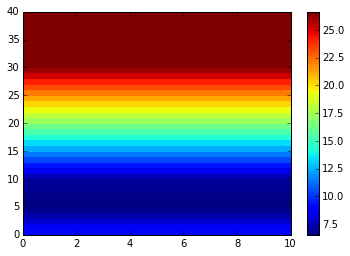

In [29]:
B=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-3.6-inputs/initial_conditions/nuts_SOG1100x10x40.nc')
NO=B.variables['NO3']
Si=B.variables['Si']
PHY=B.variables['MYRI']
NH=B.variables['NH4']
plt.pcolormesh(NO[0,:,:,3]); plt.colorbar()

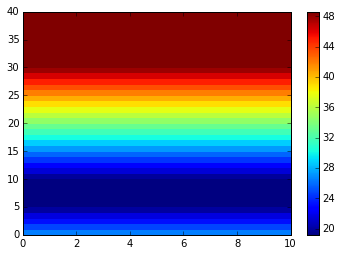

In [30]:

plt.pcolormesh(Si[0,:,:,3]); plt.colorbar()

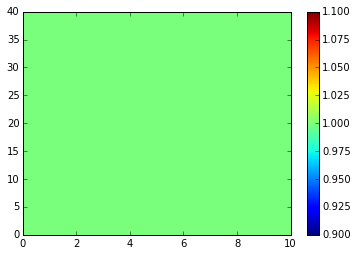

In [31]:

plt.pcolormesh(NH[0,:,:,3]); plt.colorbar()

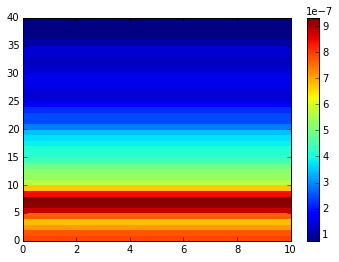

In [32]:

plt.pcolormesh(PHY[0,:,:,3]); plt.colorbar()

In [33]:
print (B.variables)

OrderedDict([('time_counter', <class 'netCDF4._netCDF4.Variable'>
float64 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('deptht', <class 'netCDF4._netCDF4.Variable'>
float64 deptht(deptht)
    units: m
    long_name: Depth
    positive: down
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('x', <class 'netCDF4._netCDF4.Variable'>
float64 x(y, x)
    units: metres
    long_name: streamwise
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('y', <class 'netCDF4._netCDF4.Variable'>
float64 y(y, x)
    units: metres
    long_name: spanwise
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('NO3', <class 'netCDF4._netCDF4.Variable'>
floa

In [34]:
B.close()